# Twitter API

Twitter API v2

In [115]:
# Instalação das bibliotecas
!pip install pandas --quiet
!pip install tweepy --quiet
!pip install wordcloud --quiet


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
# Importando as bibliotecas
import tweepy

In [117]:
# Autenticação
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMvnigEAAAAA3xreBR9B0yLusNWTYfwR%2B%2BOPdBs%3DYT8Wkub4WYfr98jGB69tEza10i9XB1L463WATLhPMebureWCbm'
client = tweepy.Client(bearer_token)

In [118]:
# Recuperando Tweets
response = client.search_recent_tweets("#Eleições2022", max_results=100)

In [119]:
# Imprimindo Tweets
tweets = response.data

for tweet in tweets:
    print(tweet.text)

RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 h…
RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 h…
Boa tarde! 
Só pra lembrar:
#OPresidenteEleitoContinuaSendoCorrupto
#OPresidenteEleitoContinuaSendoLadrão
#LdeLadrão
#Eleicoes2022
RT @siteptbr: Gizelly Bicalho foi chamada de “sem-teto” por vizinhos de condomínio bolsonaristas e macetou:

“Eu tenho 2[apartamentos] amor…
RT @siteptbr: 🚨 Lula irá criar Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 https://t.co/pckwQgEbuq
RT @siteptbr: 🚨 Principal doador de fundo para a Amazônia, Noruega retomará ajuda após vitória de Lula! #Eleicoes2022 https://t.co/p2dlv615…
RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 h…
RT @SeriesBrasil: 🚨 Lula ace

In [120]:
# Agrupando os tweets em um dataframe
import pandas as pd

tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['Texto'])
pd.options.display.max_colwidth = 130 
df.head()

,Texto
0,RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #E...
1,RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #E...
2,Boa tarde! \nSó pra lembrar:\n#OPresidenteEleitoContinuaSendoCorrupto\n#OPresidenteEleitoContinuaSendoLadrão\n#LdeLadrão\n#Ele...
3,RT @siteptbr: Gizelly Bicalho foi chamada de “sem-teto” por vizinhos de condomínio bolsonaristas e macetou:\n\n“Eu tenho 2[apa...
4,RT @siteptbr: 🚨 Lula irá criar Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 https://t.co/p...


In [121]:
# Agrupando os tweets em uma string única
string = pd.Series(df['Texto'].values).str.cat(sep=' ')
string

'RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 h… RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 h… Boa tarde! \nSó pra lembrar:\n#OPresidenteEleitoContinuaSendoCorrupto\n#OPresidenteEleitoContinuaSendoLadrão\n#LdeLadrão\n#Eleicoes2022 RT @siteptbr: Gizelly Bicalho foi chamada de “sem-teto” por vizinhos de condomínio bolsonaristas e macetou:\n\n“Eu tenho 2[apartamentos] amor… RT @siteptbr: 🚨 Lula irá criar Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 https://t.co/pckwQgEbuq RT @siteptbr: 🚨 Principal doador de fundo para a Amazônia, Noruega retomará ajuda após vitória de Lula! #Eleicoes2022 https://t.co/p2dlv615… RT @SeriesBrasil: 🚨 Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. #Eleicoes2022 h… RT @SeriesBrasil: 🚨 

In [122]:
# Removendo caracteres especiais
caracteres = "@#🚨🗣️🔵"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'RT SeriesBrasil:  Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. Eleicoes2022 h… RT SeriesBrasil:  Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. Eleicoes2022 h… Boa tarde! \nSó pra lembrar:\nOPresidenteEleitoContinuaSendoCorrupto\nOPresidenteEleitoContinuaSendoLadrão\nLdeLadrão\nEleicoes2022 RT siteptbr: Gizelly Bicalho foi chamada de “sem-teto” por vizinhos de condomínio bolsonaristas e macetou:\n\n“Eu tenho 2[apartamentos] amor… RT siteptbr:  Lula irá criar Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. Eleicoes2022 https://t.co/pckwQgEbuq RT siteptbr:  Principal doador de fundo para a Amazônia, Noruega retomará ajuda após vitória de Lula! Eleicoes2022 https://t.co/p2dlv615… RT SeriesBrasil:  Lula aceitou a proposta de criar uma Secretaria Nacional de Saúde Mental dentro do Ministério da Saúde. Eleicoes2022 h… RT SeriesBrasil:  Lula aceitou a propost

In [123]:
# Ignorando classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Eleicoes2022","Eleições2022","RT","por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc', 'foi', 'após', 'antes', 'agora', 'conscientemente', 'p', 'h', 'updatetecharts', 'pckwQgEbuq', 'irá', 'SeriesBrasil'])

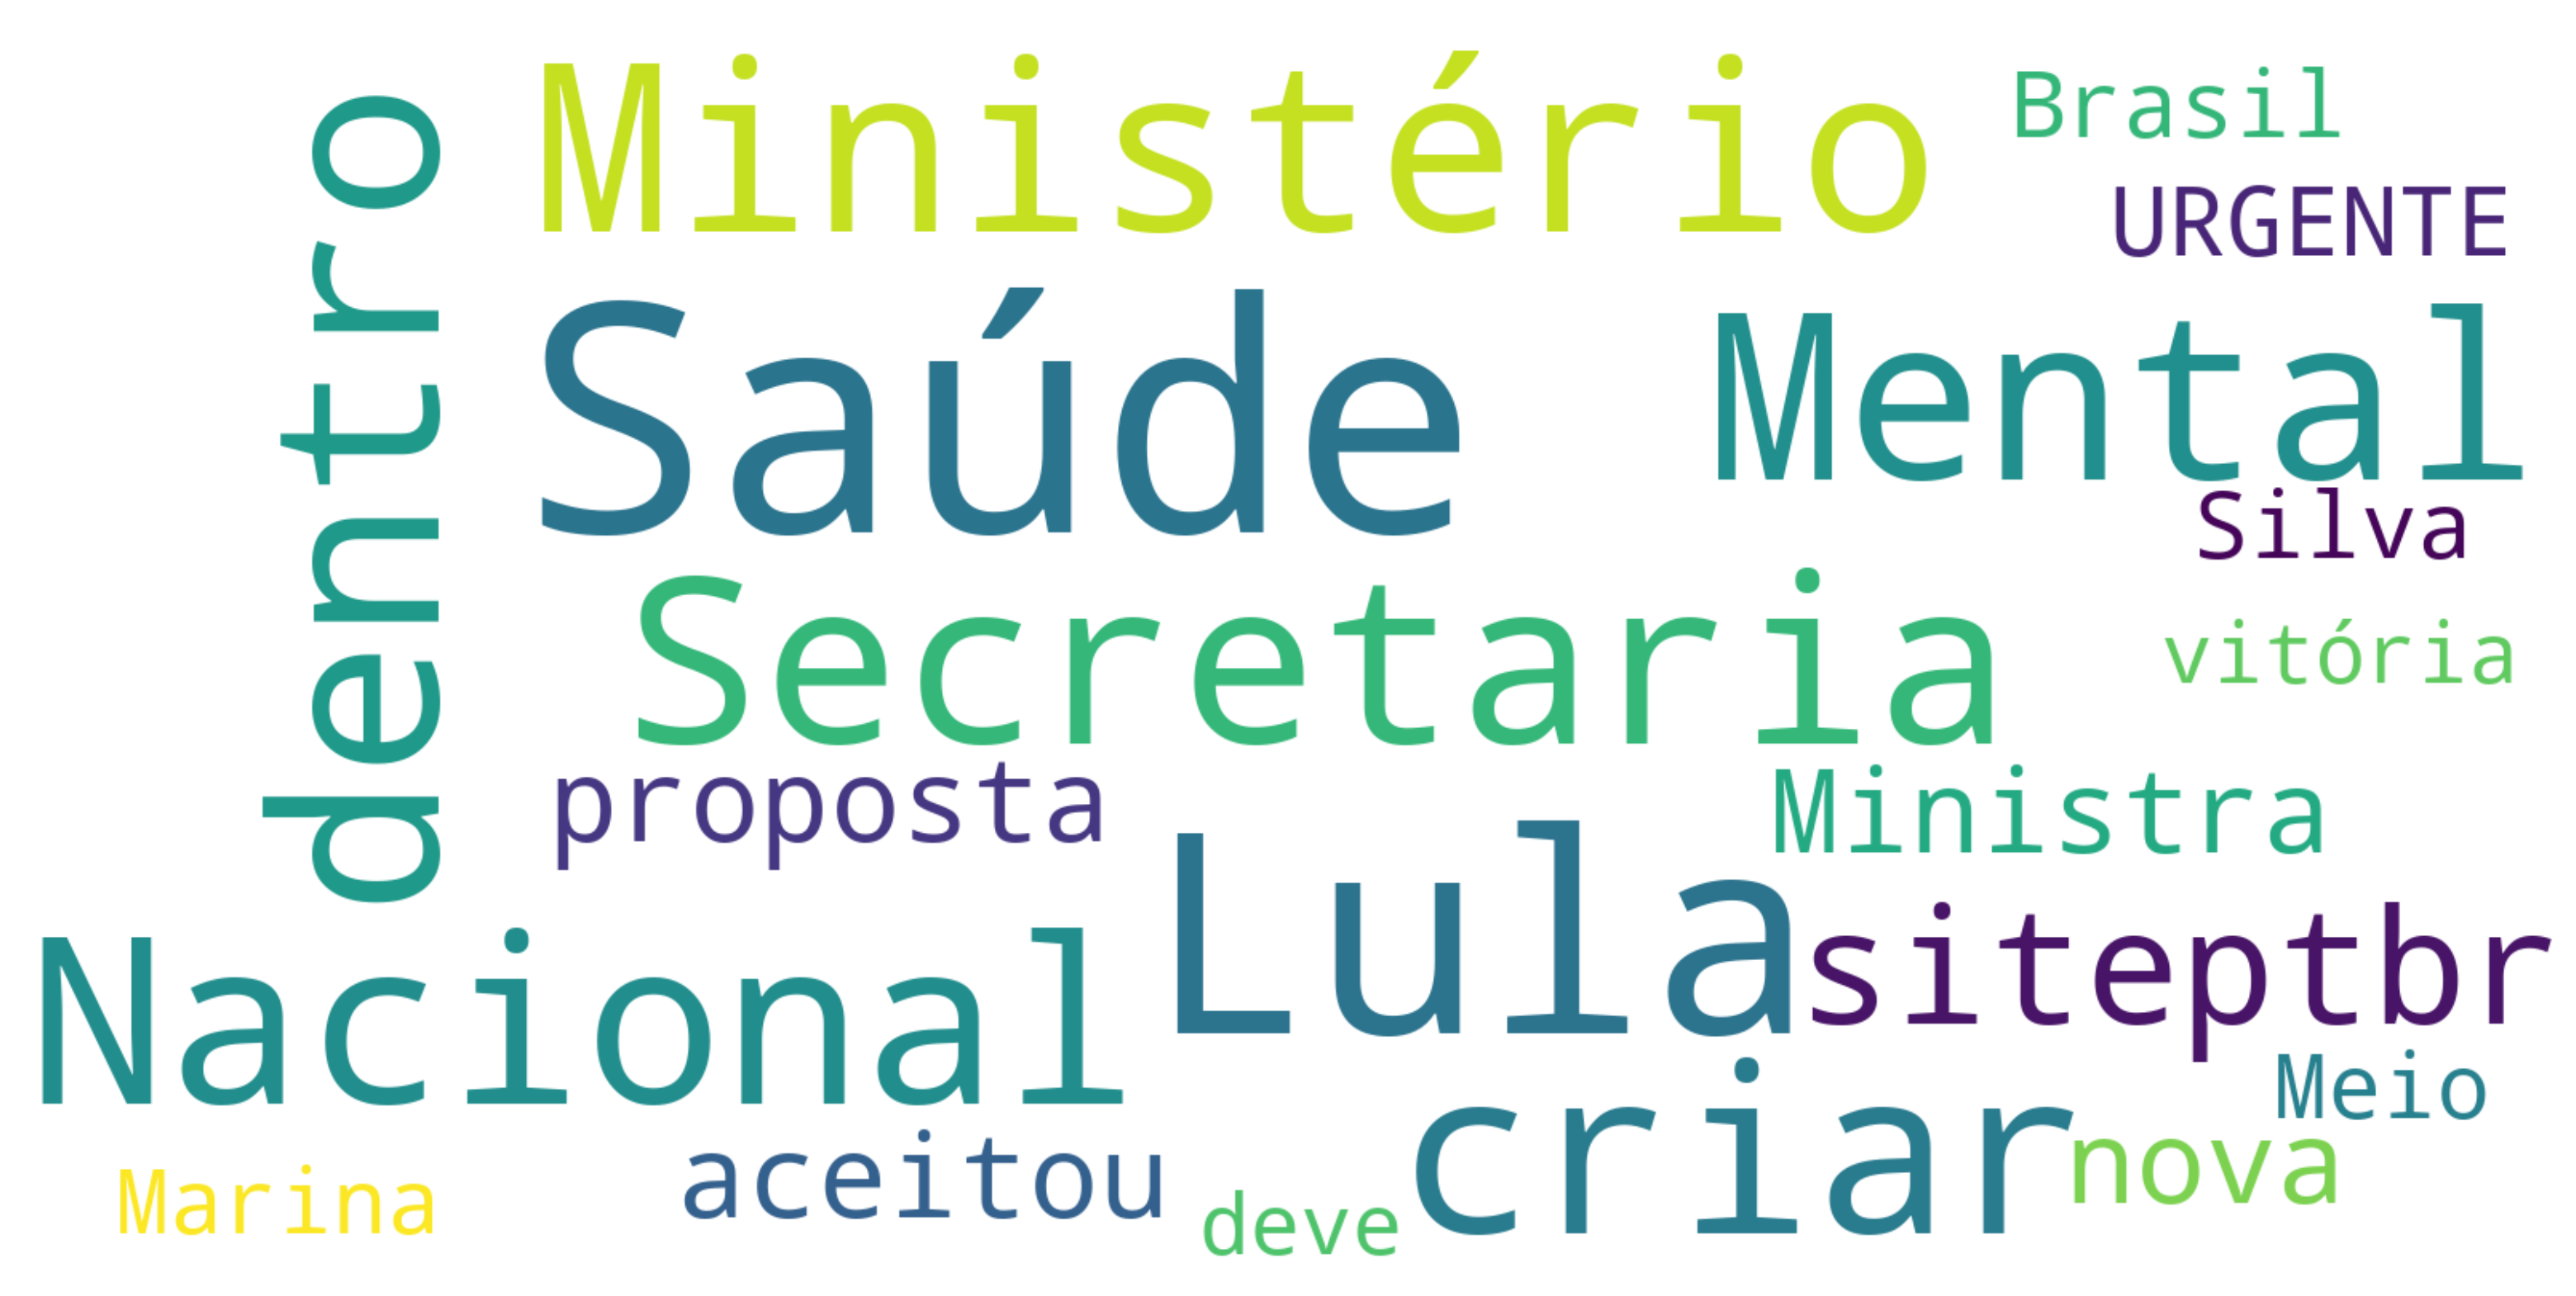

In [124]:
# Word Cloud com os textos dos tweets
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=20,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

---

# Registro de Alterações (*Change Log*)

| Data (DD/MM/YYYY) | Versão  | Alterado Por | Descrição da Mudança                |
| ----------------- | ------- | ------------ | ----------------------------------- |
| 31/10/2022        | 1.0     | David        | Versão inicial                      |